In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load the dataset from an Excel file
df = pd.read_excel(r'C:\Users\Home\Downloads\credit_fraud_data.xlsx')

In [6]:
df

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category,is_fraud
0,375.165579,68,21,18,605,22,Male,Debit,In-store,Entertainment,1
1,950.763592,88,21,4,841,5,Male,Credit,Online,Grocery,0
2,732.261948,65,15,28,760,15,Female,Debit,In-store,Entertainment,1
3,599.059826,36,23,4,525,36,Male,Credit,Online,Entertainment,0
4,156.862622,23,9,20,358,63,Male,Credit,Online,Entertainment,0
...,...,...,...,...,...,...,...,...,...,...,...
4494,735.290161,85,4,25,578,35,Female,Credit,ATM,Grocery,0
4495,610.497814,59,23,18,451,59,Male,Prepaid,ATM,Grocery,0
4496,488.689498,74,5,11,526,9,Male,Credit,In-store,Clothing,0
4497,134.048944,85,0,8,542,10,Male,Credit,In-store,Clothing,0


EDA functions

In [8]:
print(df['age'].value_counts())

age
34    79
43    75
50    75
86    73
36    72
      ..
39    52
22    51
57    51
51    49
62    48
Name: count, Length: 72, dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   transaction_amount           4499 non-null   float64
 1   age                          4499 non-null   int64  
 2   transaction_hour             4499 non-null   int64  
 3   days_since_last_transaction  4499 non-null   int64  
 4   credit_score                 4499 non-null   int64  
 5   number_of_transactions       4499 non-null   int64  
 6   gender                       4499 non-null   object 
 7   card_type                    4499 non-null   object 
 8   transaction_type             4499 non-null   object 
 9   merchant_category            4499 non-null   object 
 10  is_fraud                     4499 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 386.8+ KB


In [10]:
df.head(5)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category,is_fraud
0,375.165579,68,21,18,605,22,Male,Debit,In-store,Entertainment,1
1,950.763592,88,21,4,841,5,Male,Credit,Online,Grocery,0
2,732.261948,65,15,28,760,15,Female,Debit,In-store,Entertainment,1
3,599.059826,36,23,4,525,36,Male,Credit,Online,Entertainment,0
4,156.862622,23,9,20,358,63,Male,Credit,Online,Entertainment,0


In [11]:
df.tail()

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category,is_fraud
4494,735.290161,85,4,25,578,35,Female,Credit,ATM,Grocery,0
4495,610.497814,59,23,18,451,59,Male,Prepaid,ATM,Grocery,0
4496,488.689498,74,5,11,526,9,Male,Credit,In-store,Clothing,0
4497,134.048944,85,0,8,542,10,Male,Credit,In-store,Clothing,0
4498,262.071685,55,9,14,309,45,Male,Credit,ATM,Entertainment,0


In [12]:
df.describe()

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,is_fraud
count,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000,4499.000000
mean,496.905007,53.643921,11.647922,14.387197,574.325183,50.042009,0.255168
std,289.264692,20.902788,6.914782,8.551436,159.100236,28.685105,0.436004
min,1.011623,18.000000,0.000000,0.000000,300.000000,1.000000,0.000000
25%,244.041153,35.000000,6.000000,7.000000,434.000000,25.000000,0.000000
50%,500.900745,54.000000,12.000000,14.000000,576.000000,50.000000,0.000000
75%,744.026334,72.000000,18.000000,22.000000,711.000000,75.000000,1.000000
max,999.717956,89.000000,23.000000,29.000000,849.000000,99.000000,1.000000


In [13]:
df.shape

(4499, 11)

In [14]:
df.dtypes

transaction_amount             float64
age                              int64
transaction_hour                 int64
days_since_last_transaction      int64
credit_score                     int64
number_of_transactions           int64
gender                          object
card_type                       object
transaction_type                object
merchant_category               object
is_fraud                         int64
dtype: object

In [15]:
df.nunique()

transaction_amount             4499
age                              72
transaction_hour                 24
days_since_last_transaction      30
credit_score                    550
number_of_transactions           99
gender                            2
card_type                         3
transaction_type                  3
merchant_category                 5
is_fraud                          2
dtype: int64

In [16]:
df.isnull().sum()

transaction_amount             0
age                            0
transaction_hour               0
days_since_last_transaction    0
credit_score                   0
number_of_transactions         0
gender                         0
card_type                      0
transaction_type               0
merchant_category              0
is_fraud                       0
dtype: int64

In [17]:
df.columns

Index(['transaction_amount', 'age', 'transaction_hour',
       'days_since_last_transaction', 'credit_score', 'number_of_transactions',
       'gender', 'card_type', 'transaction_type', 'merchant_category',
       'is_fraud'],
      dtype='object')

In [18]:
# Encode the 'merchant_category' column
df['merchant_category_encoded'] = df['merchant_category'].astype('category').cat.codes

# Display the first few rows to verify the encoding
df.head()

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category,is_fraud,merchant_category_encoded
0,375.165579,68,21,18,605,22,Male,Debit,In-store,Entertainment,1,2
1,950.763592,88,21,4,841,5,Male,Credit,Online,Grocery,0,3
2,732.261948,65,15,28,760,15,Female,Debit,In-store,Entertainment,1,2
3,599.059826,36,23,4,525,36,Male,Credit,Online,Entertainment,0,2
4,156.862622,23,9,20,358,63,Male,Credit,Online,Entertainment,0,2


In [19]:
# Encode the 'merchant_category' column
df['merchant_category_encoded'] = df['merchant_category'].astype('category').cat.codes

# Calculate the correlation between 'transaction_amount' and the encoded 'merchant_category'
correlation = df['transaction_amount'].corr(df['merchant_category_encoded']).round(5)
print(f"Correlation between Transaction Amount and Merchant Category: {correlation}")

Correlation between Transaction Amount and Merchant Category: -0.01112


In [20]:
# Drop the 'merchant_category' column from the dataset
df_dropped = df.drop('merchant_category', axis=1)

# Display the first few rows of the modified dataset to verify the column has been dropped
df_dropped.head()

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,is_fraud,merchant_category_encoded
0,375.165579,68,21,18,605,22,Male,Debit,In-store,1,2
1,950.763592,88,21,4,841,5,Male,Credit,Online,0,3
2,732.261948,65,15,28,760,15,Female,Debit,In-store,1,2
3,599.059826,36,23,4,525,36,Male,Credit,Online,0,2
4,156.862622,23,9,20,358,63,Male,Credit,Online,0,2


In [21]:
# Sort the DataFrame by 'credit_score' in descending order
sorted_df = df.sort_values(by='credit_score', ascending=False)

# Display the first few rows of the sorted DataFrame
sorted_df.head()

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category,is_fraud,merchant_category_encoded
836,914.931055,71,4,29,849,72,Male,Prepaid,Online,Grocery,0,3
2126,635.036602,34,6,29,849,33,Male,Debit,Online,Clothing,0,0
1118,266.334443,63,15,20,849,37,Female,Credit,In-store,Electronics,0,1
1275,105.825248,80,21,26,849,69,Female,Debit,In-store,Grocery,1,3
48,547.163569,30,15,18,849,11,Male,Credit,In-store,Entertainment,0,2


In [22]:
df.sample(2)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category,is_fraud,merchant_category_encoded
4112,70.324692,46,15,11,633,37,Male,Debit,ATM,Travel,0,4
4084,219.495175,74,7,2,359,8,Male,Credit,In-store,Travel,1,4


In [23]:
# Replace NaN values with 0
df.fillna(value=0, inplace=True)

# Print the DataFrame to check the changes
print(df)

      transaction_amount  age  transaction_hour  days_since_last_transaction  \
0             375.165579   68                21                           18   
1             950.763592   88                21                            4   
2             732.261948   65                15                           28   
3             599.059826   36                23                            4   
4             156.862622   23                 9                           20   
...                  ...  ...               ...                          ...   
4494          735.290161   85                 4                           25   
4495          610.497814   59                23                           18   
4496          488.689498   74                 5                           11   
4497          134.048944   85                 0                            8   
4498          262.071685   55                 9                           14   

      credit_score  number_of_transacti

In [24]:
df.isna()

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category,is_fraud,merchant_category_encoded
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4494,False,False,False,False,False,False,False,False,False,False,False,False
4495,False,False,False,False,False,False,False,False,False,False,False,False
4496,False,False,False,False,False,False,False,False,False,False,False,False
4497,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
# Replace 'In-store' with 1 and 'Online' with 0 in the 'transaction_type' column
df['transaction_type'] = df['transaction_type'].replace({'In-store': 1, 'Online': 0})

# Print the modified 'transaction_type' column
print(df['transaction_type'])

0         1
1         0
2         1
3         0
4         0
       ... 
4494    ATM
4495    ATM
4496      1
4497      1
4498    ATM
Name: transaction_type, Length: 4499, dtype: object


In [26]:
# Access the first row (index 0)
row = df.iloc[0]
print(row)

transaction_amount                375.165579
age                                       68
transaction_hour                          21
days_since_last_transaction               18
credit_score                             605
number_of_transactions                    22
gender                                  Male
card_type                              Debit
transaction_type                           1
merchant_category              Entertainment
is_fraud                                   1
merchant_category_encoded                  2
Name: 0, dtype: object


In [27]:
# Access the row with index 0 (assuming default integer index)
row = df.loc[0]
print(row)

transaction_amount                375.165579
age                                       68
transaction_hour                          21
days_since_last_transaction               18
credit_score                             605
number_of_transactions                    22
gender                                  Male
card_type                              Debit
transaction_type                           1
merchant_category              Entertainment
is_fraud                                   1
merchant_category_encoded                  2
Name: 0, dtype: object


Histogram

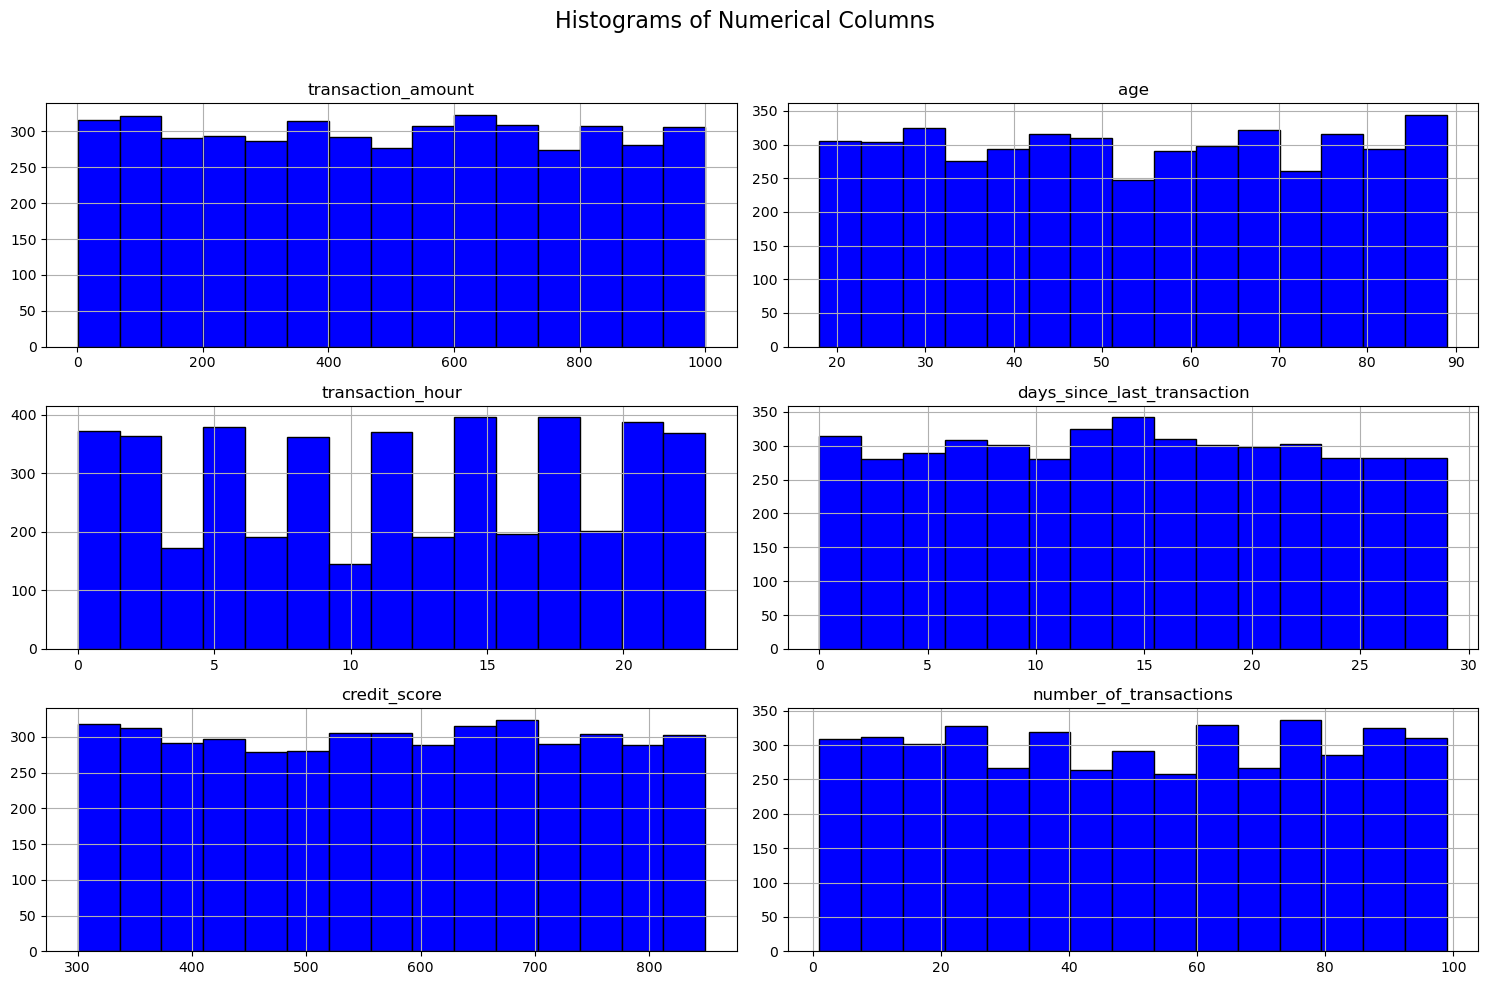

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_cols = ['transaction_amount', 'age', 'transaction_hour', 'days_since_last_transaction', 'credit_score', 'number_of_transactions']

# Plot histograms for numerical variables
df[numerical_cols].hist(bins=15, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to make room for the title
plt.show()

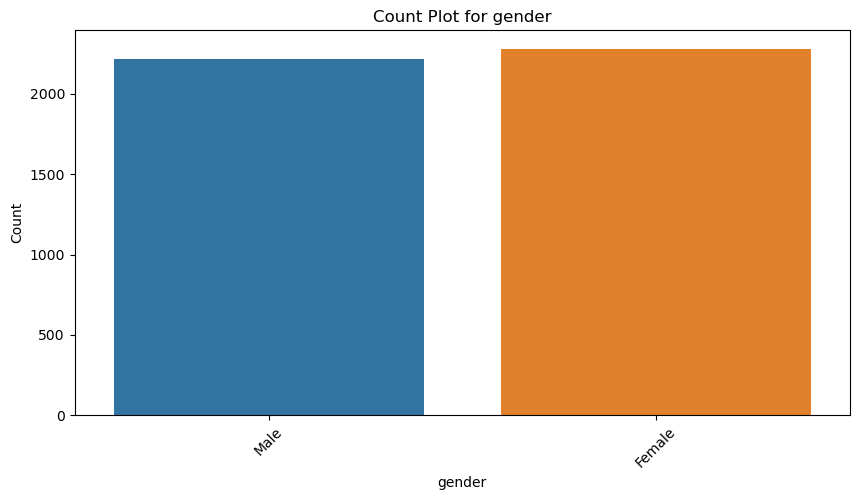

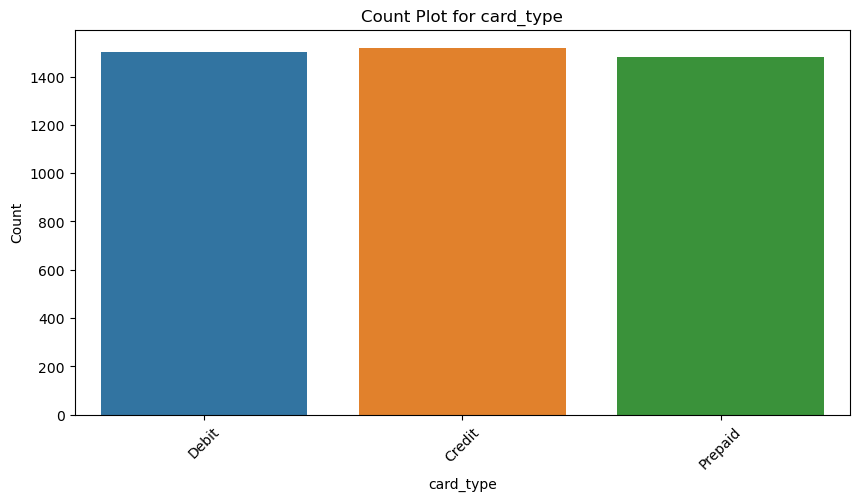

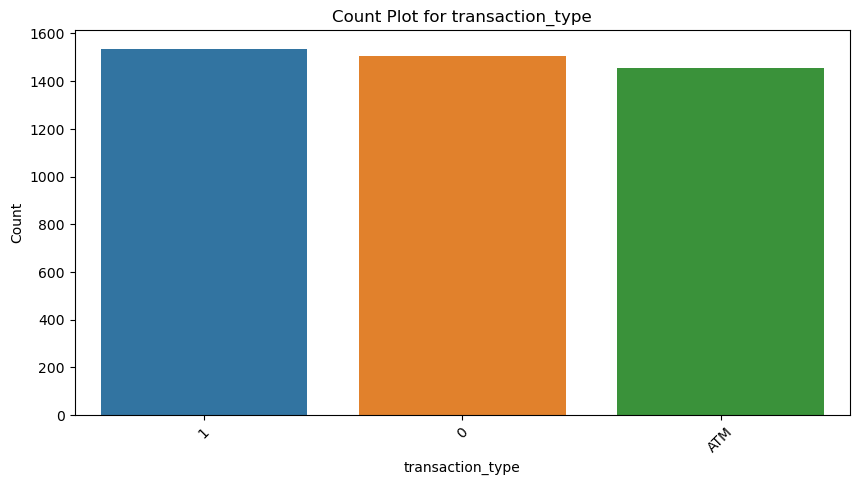

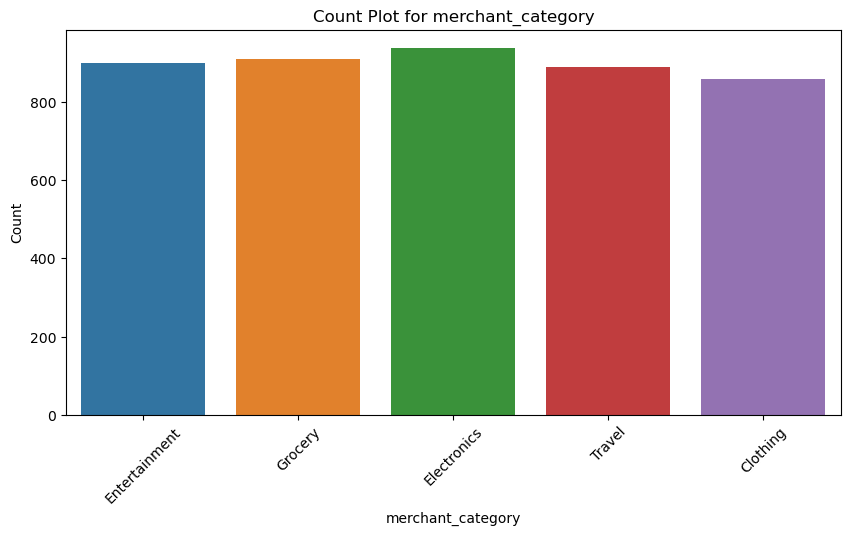

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
categorical_cols = ['gender', 'card_type', 'transaction_type', 'merchant_category']

# Plot bar plots for categorical variables
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45) 
    plt.show()

C:\Users\Home\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Home\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Home\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


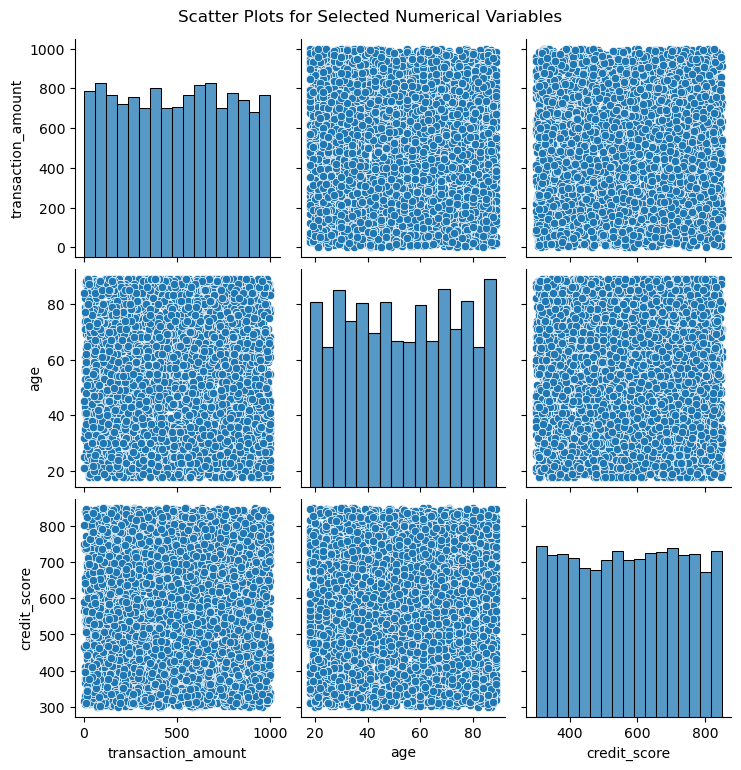

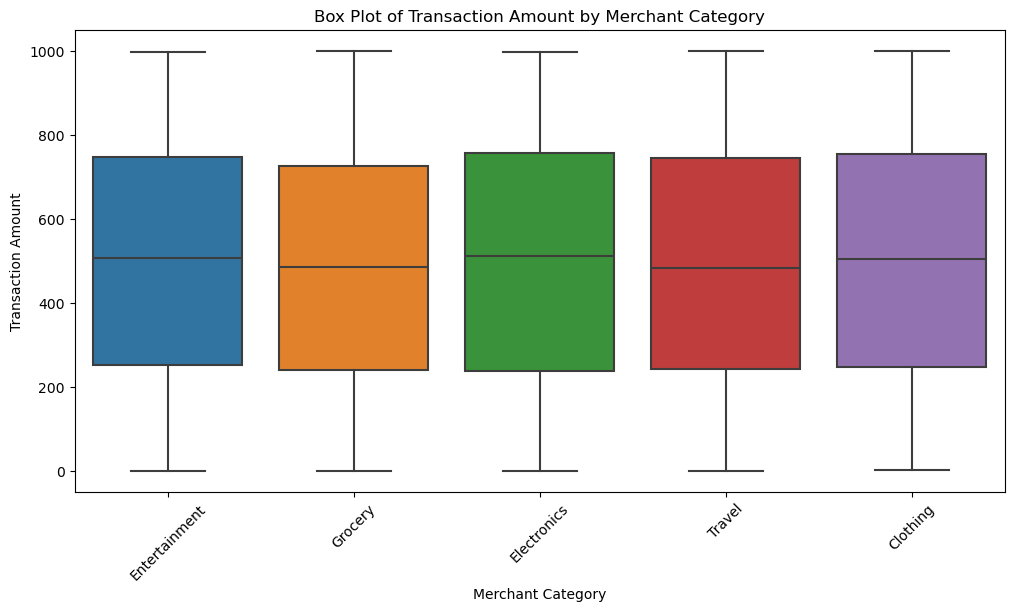

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plots for numerical variables
sns.pairplot(df, vars=['transaction_amount', 'age', 'credit_score'])
plt.suptitle('Scatter Plots for Selected Numerical Variables', y=1.02)
plt.show()

# Box plot for transaction amount by merchant category
plt.figure(figsize=(12, 6))
sns.boxplot(x='merchant_category', y='transaction_amount', data=df)
plt.title('Box Plot of Transaction Amount by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45) 
plt.show()

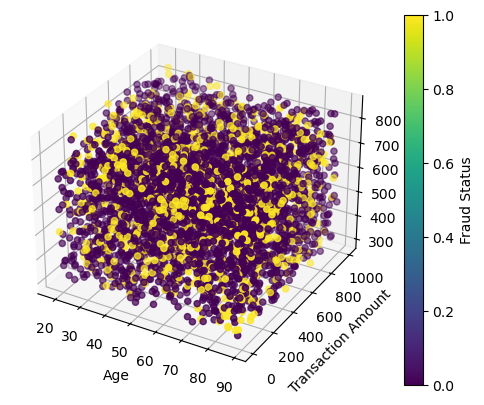

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using 'age', 'transaction_amount', and 'credit_score', colored by 'is_fraud'
scatter = ax.scatter(df['age'], df['transaction_amount'], df['credit_score'], c=df['is_fraud'], cmap='viridis')

# Setting labels
ax.set_xlabel('Age')
ax.set_ylabel('Transaction Amount')
ax.set_zlabel('Credit Score')

# Adding color bar to interpret the 'is_fraud' status
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Fraud Status')

plt.show()

In [33]:
import sweetviz as sv
import pandas as pd

# Convert the 'transaction_type' column to numerical values, coercing errors to NaN
df['transaction_type'] = pd.to_numeric(df['transaction_type'], errors='coerce')

# Generate the Sweetviz report
report = sv.analyze(df)

# Save the report to an HTML file
report.show_html('credit_fraud_analysis_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report credit_fraud_analysis_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [34]:
##Missing value imputation
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame
# Separate the numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Initialize the KNN Imputer for numeric columns
knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform the numeric columns
imputed_numeric_data = knn_imputer.fit_transform(df[numeric_cols])

# Convert the imputed numeric data back to a DataFrame
df_imputed_numeric = pd.DataFrame(imputed_numeric_data, columns=numeric_cols)

# Initialize the Simple Imputer for categorical columns
median_imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the categorical columns
imputed_categorical_data = median_imputer.fit_transform(df[categorical_cols])

# Convert the imputed categorical data back to a DataFrame
df_imputed_categorical = pd.DataFrame(imputed_categorical_data, columns=categorical_cols)

# Combine the imputed numeric and categorical columns back into a single DataFrame
df_imputed = pd.concat([df_imputed_numeric, df_imputed_categorical.reset_index(drop=True)], axis=1)

In [35]:
df_imputed.isnull().sum()

transaction_amount             0
age                            0
transaction_hour               0
days_since_last_transaction    0
credit_score                   0
number_of_transactions         0
transaction_type               0
is_fraud                       0
merchant_category_encoded      0
gender                         0
card_type                      0
merchant_category              0
dtype: int64

In [36]:
##Outlier removal and feature scaling
# List of columns to cap z-scores
columns_to_cap = [ 'transaction_amount', 'age', 'transaction_hour',
       'days_since_last_transaction', 'credit_score', 'number_of_transactions',
       'gender', 'card_type', 'transaction_type', 'merchant_category',
       'is_fraud' ]

# Cap values directly using np.clip

##Feature scaling
df_imputed_numeric_scaled = (df_imputed[numeric_cols] - df_imputed[numeric_cols].mean()) / df_imputed[numeric_cols].std()

##Outlier removal
# Replace all values with z-scores greater than 3 with 3 and less than -3 with -3
df_imputed_numeric_scaled = df_imputed_numeric_scaled.clip(lower=-3, upper=3)
##combine numerical and catagerical column
# Combine scaled numerical features with categorical features
df_final = pd.concat([df_imputed_numeric_scaled, df_imputed[categorical_cols].reset_index(drop=True)], axis=1)

df_final.describe().round(2)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,transaction_type,is_fraud,merchant_category_encoded
count,4499.00,4499.00,4499.00,4499.00,4499.00,4499.00,4499.00,4499.00,4499.00
mean,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.71,-1.71,-1.68,-1.68,-1.72,-1.71,-1.18,-0.59,-1.43
25%,-0.87,-0.89,-0.82,-0.86,-0.88,-0.87,-1.18,-0.59,-0.72
50%,0.01,0.02,0.05,-0.05,0.01,-0.00,0.21,-0.59,-0.01
75%,0.85,0.88,0.92,0.89,0.86,0.87,1.14,1.71,0.71
max,1.74,1.69,1.64,1.71,1.73,1.71,1.14,1.71,1.42


In [37]:
df

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category,is_fraud,merchant_category_encoded
0,375.165579,68,21,18,605,22,Male,Debit,1.0,Entertainment,1,2
1,950.763592,88,21,4,841,5,Male,Credit,0.0,Grocery,0,3
2,732.261948,65,15,28,760,15,Female,Debit,1.0,Entertainment,1,2
3,599.059826,36,23,4,525,36,Male,Credit,0.0,Entertainment,0,2
4,156.862622,23,9,20,358,63,Male,Credit,0.0,Entertainment,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
4494,735.290161,85,4,25,578,35,Female,Credit,NaN,Grocery,0,3
4495,610.497814,59,23,18,451,59,Male,Prepaid,NaN,Grocery,0,3
4496,488.689498,74,5,11,526,9,Male,Credit,1.0,Clothing,0,0
4497,134.048944,85,0,8,542,10,Male,Credit,1.0,Clothing,0,0


In [38]:
df.columns

Index(['transaction_amount', 'age', 'transaction_hour',
       'days_since_last_transaction', 'credit_score', 'number_of_transactions',
       'gender', 'card_type', 'transaction_type', 'merchant_category',
       'is_fraud', 'merchant_category_encoded'],
      dtype='object')

In [39]:
# Define categorical and numerical columns based on available data
categorical_cols = ['gender', 'card_type', 'transaction_type', 'merchant_category']
numerical_cols = ['transaction_amount', 'age', 'transaction_hour', 'days_since_last_transaction', 'credit_score', 'number_of_transactions']

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['gender', 'card_type', 'transaction_type', 'merchant_category']
Numerical Columns: ['transaction_amount', 'age', 'transaction_hour', 'days_since_last_transaction', 'credit_score', 'number_of_transactions']


In [40]:
# Apply One-Hot Encoding for 
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_cols]), columns=one_hot_encoder.get_feature_names_out(categorical_cols))
df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_categorical], axis=1)

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [77]:
df.head()

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,is_fraud,merchant_category_encoded,gender_Male,card_type_Debit,card_type_Prepaid,transaction_type_1.0,transaction_type_nan,merchant_category_Electronics,merchant_category_Entertainment,merchant_category_Grocery,merchant_category_Travel
0,375.165579,68,21,18,605,22,1,2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,950.763592,88,21,4,841,5,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,732.261948,65,15,28,760,15,1,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,599.059826,36,23,4,525,36,0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,156.862622,23,9,20,358,63,0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [83]:
# Define categorical and numerical columns
categorical_cols = ['merchant_category', 'transaction_type' , 'card_type', 'gender']
numerical_cols = ['transaction_amount','age','transaction_hour', 'days_since_last_transaction', 'credit_score',
                                   'number_of_transactions']

In [85]:
df

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,is_fraud,merchant_category_encoded,gender_Male,card_type_Debit,card_type_Prepaid,transaction_type_1.0,transaction_type_nan,merchant_category_Electronics,merchant_category_Entertainment,merchant_category_Grocery,merchant_category_Travel
0,375.165579,68,21,18,605,22,1,2,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,950.763592,88,21,4,841,5,0,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,732.261948,65,15,28,760,15,1,2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,599.059826,36,23,4,525,36,0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,156.862622,23,9,20,358,63,0,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4494,735.290161,85,4,25,578,35,0,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4495,610.497814,59,23,18,451,59,0,3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4496,488.689498,74,5,11,526,9,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4497,134.048944,85,0,8,542,10,0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [89]:
import pandas as pd

# Assuming df is already loaded and processed

# Define the numerical features and target variable
numerical_features = ['transaction_amount', 'age', 'transaction_hour', 'days_since_last_transaction', 'credit_score', 'number_of_transactions']
target_variable = 'is_fraud'  # Replace with the correct target variable if different

# Calculate correlation coefficients between numerical features and the target variable
correlations = df[numerical_features + [target_variable]].corr()[target_variable].sort_values()

# Display the correlations
print(correlations)

transaction_hour               0.000014
age                            0.001507
transaction_amount             0.002242
days_since_last_transaction    0.005217
number_of_transactions         0.008564
credit_score                   0.011210
is_fraud                       1.000000
Name: is_fraud, dtype: float64


In [97]:
import pandas as pd
import numpy as np

def calculate_iv(df, feature, target):
    lst = []
    for val in df[feature].unique():
        good = df[(df[feature] == val) & (df[target] == 0)].count()[feature]
        bad = df[(df[feature] == val) & (df[target] == 1)].count()[feature]
        all_count = good + bad
        lst.append({
            'Value': val,
            'All': all_count,
            'Good': good,
            'Bad': bad
        })
    
    iv_df = pd.DataFrame(lst)
    iv_df['Share'] = iv_df['All'] / iv_df['All'].sum()
    iv_df['Bad Rate'] = iv_df['Bad'] / iv_df['All']
    iv_df['Good Rate'] = iv_df['Good'] / iv_df['All']
    
    # Handling zero rates to avoid division by zero or log(0)
    iv_df['Bad Rate'] = iv_df['Bad Rate'].replace({0: 0.0001})
    iv_df['Good Rate'] = iv_df['Good Rate'].replace({0: 0.0001})
    
    iv_df['WOE'] = np.log(iv_df['Good Rate'] / iv_df['Bad Rate'])
    iv_df['IV'] = (iv_df['Good Rate'] - iv_df['Bad Rate']) * iv_df['WOE']
    iv = iv_df['IV'].sum()
    return iv

# Define your categorical features - ensure these match the actual columns in your DataFrame
categorical_features = [
    'gender_Male', 'card_type_Debit', 'card_type_Prepaid',  
    'merchant_category_Electronics', 'merchant_category_Entertainment', 
    'merchant_category_Grocery', 'merchant_category_Travel'
]

print("\nInformation Value (IV) for categorical features:")
for feature in categorical_features:
    iv = calculate_iv(df, feature, 'is_fraud')  # Use the correct target variable if different
    print(f"{feature}: {iv}")


Information Value (IV) for categorical features:
gender_Male: 1.049315784363943
card_type_Debit: 1.0471428178888444
card_type_Prepaid: 1.0302016526469204
merchant_category_Electronics: 1.050383089232602
merchant_category_Entertainment: 1.0221451700670983
merchant_category_Grocery: 1.0904719610974327
merchant_category_Travel: 1.041568142544516


In [101]:
# Check the column names in the DataFrame
print(df.columns)

# Correct column name if necessary
# df = df.drop(columns=['correct_column_name'])  # Replace 'correct_column_name' with the exact column name

# If 'cb_person_cred_hist_length' is correct and exists, use the following
# df = df.drop(columns=['cb_person_cred_hist_length'])

Index(['transaction_amount', 'age', 'transaction_hour',
       'days_since_last_transaction', 'credit_score', 'number_of_transactions',
       'is_fraud', 'merchant_category_encoded', 'gender_Male',
       'card_type_Debit', 'card_type_Prepaid', 'transaction_type_1.0',
       'transaction_type_nan', 'merchant_category_Electronics',
       'merchant_category_Entertainment', 'merchant_category_Grocery',
       'merchant_category_Travel'],
      dtype='object')


In [107]:
# Check the column names in the DataFrame
print(df.columns)

# Identify the correct target variable column and use it accordingly
# Assuming 'is_fraud' might be the correct target variable name based on your previous context
# Define features and target
X = df.drop(columns=['is_fraud'])  # Replace 'is_fraud' with the correct column name if different
y = df['is_fraud']  # Replace 'is_fraud' with the correct column name if different

# Find class ratio in the original data
class_ratio = y.value_counts(normalize=True)
print(f"Class ratio before SMOTE:\n{class_ratio}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class ratio after resampling
class_ratio_resampled = y_train_resampled.value_counts(normalize=True)
print(f"Class ratio after SMOTE:\n{class_ratio_resampled}")

Index(['transaction_amount', 'age', 'transaction_hour',
       'days_since_last_transaction', 'credit_score', 'number_of_transactions',
       'is_fraud', 'merchant_category_encoded', 'gender_Male',
       'card_type_Debit', 'card_type_Prepaid', 'transaction_type_1.0',
       'transaction_type_nan', 'merchant_category_Electronics',
       'merchant_category_Entertainment', 'merchant_category_Grocery',
       'merchant_category_Travel'],
      dtype='object')
Class ratio before SMOTE:
is_fraud
0    0.744832
1    0.255168
Name: proportion, dtype: float64
Class ratio after SMOTE:
is_fraud
0    0.5
1    0.5
Name: proportion, dtype: float64


In [111]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Define features and target
X = df.drop(columns=['is_fraud'])  # Replace 'is_fraud' with the correct target column if different
y = df['is_fraud']  # Replace 'is_fraud' with the correct target column if different

# Find class ratio in the original data
class_ratio = y.value_counts(normalize=True)
print(f"Class ratio before SMOTE:\n{class_ratio}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Support Vector Machine': SVC(probability=True)
}

# Evaluate each model and print the classification report
for name, model in models.items():
    model.fit(X_train_resampled_scaled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print('-' * 60)

Class ratio before SMOTE:
is_fraud
0    0.744832
1    0.255168
Name: proportion, dtype: float64
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.73      1.00      0.85       661
           1       0.00      0.00      0.00       239

    accuracy                           0.73       900
   macro avg       0.37      0.50      0.42       900
weighted avg       0.54      0.73      0.62       900

------------------------------------------------------------
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       661
           1       0.29      0.33      0.31       239

    accuracy                           0.61       900
   macro avg       0.52      0.52      0.51       900
weighted avg       0.62      0.61      0.61       900

------------------------------------------------------------


C:\Users\Home\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Home\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Home\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Bagging Classifier:
              precision    recall  f1-score   support

           0       0.73      0.90      0.81       661
           1       0.19      0.06      0.09       239

    accuracy                           0.68       900
   macro avg       0.46      0.48      0.45       900
weighted avg       0.58      0.68      0.62       900

------------------------------------------------------------
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.73      0.98      0.84       661
           1       0.08      0.00      0.01       239

    accuracy                           0.72       900
   macro avg       0.40      0.49      0.42       900
weighted avg       0.56      0.72      0.62       900

------------------------------------------------------------
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.73      1.00    

C:\Users\Home\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:46:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       661
           1       0.11      0.00      0.01       239

    accuracy                           0.73       900
   macro avg       0.42      0.50      0.42       900
weighted avg       0.57      0.73      0.62       900

------------------------------------------------------------


In [113]:
##Model selection
#Changing cut off level
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Evaluate XGBoost model at various cutoff levels
cutoff_levels = [0.3, 0.4, 0.5, 0.6, 0.7]
for cutoff in cutoff_levels:
    y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= cutoff).astype(int)
    print(f"Classification Report for XGBoost at cutoff {cutoff}:")
    print(classification_report(y_test, y_pred))
    print('-' * 60)

Classification Report for XGBoost at cutoff 0.3:
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       661
           1       0.25      0.26      0.26       239

    accuracy                           0.60       900
   macro avg       0.49      0.49      0.49       900
weighted avg       0.60      0.60      0.60       900

------------------------------------------------------------
Classification Report for XGBoost at cutoff 0.4:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       661
           1       0.27      0.17      0.21       239

    accuracy                           0.66       900
   macro avg       0.50      0.50      0.49       900
weighted avg       0.61      0.66      0.63       900

------------------------------------------------------------
Classification Report for XGBoost at cutoff 0.5:
              precision    recall  f1-score   support

           0       0.7

C:\Users\Home\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:48:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [115]:
##Hyper paranmerer tuning

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, accuracy_score

# Define the model
xgb_model = xgb.XGBClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.3],

 
    'gamma': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 0.5],
    
}

# Define a custom scorer to use a cut-off threshold of 0.3 for classification
def custom_scorer(y_true, y_pred_proba, threshold=0.3):
    y_pred = (y_pred_proba[:, 1] >= threshold).astype(int)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    return (recall + accuracy) / 2

scorer = make_scorer(custom_scorer, needs_proba=True)

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring=scorer, cv=3, verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best combined Recall and Accuracy score: ", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)
y_pred = (y_pred_proba[:, 1] >= 0.3).astype(int)

print("Test set Recall: ", recall_score(y_test, y_pred))
print("Test set Accuracy: ", accuracy_score(y_test, y_pred))

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters found:  {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'reg_alpha': 0}
Best combined Recall and Accuracy score:  nan
Test set Recall:  0.0041841004184100415
Test set Accuracy:  0.7277777777777777


C:\Users\Home\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan na

In [117]:
#cross validation

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, recall_score, accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE 



# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X_res=X_train
y_res= y_train 
# Initialize the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=11, shuffle=True, random_state=42)

# Perform cross-validation
recall_scores = []
accuracy_scores = []

# Ensure X_res and y_res are numpy arrays for indexing
X_res_np = np.array(X_res)
y_res_np = np.array(y_res)

for train_index, test_index in kf.split(X_res_np, y_res_np):
    X_train_fold, X_test_fold = X_res_np[train_index], X_res_np[test_index]
    y_train_fold, y_test_fold = y_res_np[train_index], y_res_np[test_index]
    
    xgb_model.fit(X_train_fold, y_train_fold)
    y_pred_proba = xgb_model.predict_proba(X_test_fold)[:, 1]
    y_pred = (y_pred_proba >= 0.3).astype(int)
    
    recall_scores.append(recall_score(y_test_fold, y_pred))
    accuracy_scores.append(accuracy_score(y_test_fold, y_pred))

average_recall = np.mean(recall_scores)
average_accuracy = np.mean(accuracy_scores)

print(f"Average Recall at cutoff 0.3: {average_recall}")
print(f"Average Accuracy at cutoff 0.3: {average_accuracy}")

print(recall_scores)
print(accuracy_scores)

C:\Users\Home\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:49:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Home\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:49:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Home\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:49:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Home\anaconda3\Lib\site-packages\xgbo

Average Recall at cutoff 0.3: 0.24871103037426873
Average Accuracy at cutoff 0.3: 0.6115546831031279
[0.21686746987951808, 0.3132530120481928, 0.2073170731707317, 0.25609756097560976, 0.2682926829268293, 0.34146341463414637, 0.1927710843373494, 0.24096385542168675, 0.1686746987951807, 0.2289156626506024, 0.30120481927710846]
[0.573170731707317, 0.6646341463414634, 0.6269113149847095, 0.6207951070336392, 0.6269113149847095, 0.6391437308868502, 0.5840978593272171, 0.6269113149847095, 0.5718654434250765, 0.6269113149847095, 0.5657492354740061]


C:\Users\Home\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:49:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [125]:
import pandas as pd

# Define the path to the dataset
dataset_path = r"C:\Users\Home\Downloads\credit_fraud_data (1).xlsx"

# Load the dataset into a pandas DataFrame
df_predict = pd.read_excel(dataset_path)

# Display the first few rows of the DataFrame
df_predict.head(10)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category,is_fraud
0,375.165579,68,21,18,605,22,Male,Debit,In-store,Entertainment,1
1,950.763592,88,21,4,841,5,Male,Credit,Online,Grocery,0
2,732.261948,65,15,28,760,15,Female,Debit,In-store,Entertainment,1
3,599.059826,36,23,4,525,36,Male,Credit,Online,Entertainment,0
4,156.862622,23,9,20,358,63,Male,Credit,Online,Entertainment,0
5,156.838526,44,20,27,375,93,Male,Prepaid,Online,Electronics,0
6,59.025529,70,16,19,727,79,Male,Prepaid,ATM,Electronics,0
7,866.309970,65,0,23,431,91,Male,Debit,ATM,Entertainment,1
8,601.513897,24,17,18,797,49,Female,Prepaid,In-store,Travel,1
9,708.364505,76,9,11,604,55,Male,Prepaid,ATM,Grocery,0


In [127]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# Assuming df_predict is your DataFrame
# Separate the numeric and categorical columns
numeric_cols = df_predict.select_dtypes(include=['number']).columns
categorical_cols = df_predict.select_dtypes(exclude=['number']).columns

# Initialize the KNN Imputer for numeric columns
knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform the numeric columns
imputed_numeric_data = knn_imputer.fit_transform(df_predict[numeric_cols])

# Convert the imputed numeric data back to a DataFrame
df_imputed_numeric = pd.DataFrame(imputed_numeric_data, columns=numeric_cols)

# Initialize the Simple Imputer for categorical columns
most_frequent_imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the categorical columns
imputed_categorical_data = most_frequent_imputer.fit_transform(df_predict[categorical_cols])

# Convert the imputed categorical data back to a DataFrame
df_imputed_categorical = pd.DataFrame(imputed_categorical_data, columns=categorical_cols)

# Combine the imputed numeric and categorical columns back into a single DataFrame
df = pd.concat([df_imputed_numeric, df_imputed_categorical.reset_index(drop=True)], axis=1)

df.head(10)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,is_fraud,gender,card_type,transaction_type,merchant_category
0,375.165579,68.0,21.0,18.0,605.0,22.0,1.0,Male,Debit,In-store,Entertainment
1,950.763592,88.0,21.0,4.0,841.0,5.0,0.0,Male,Credit,Online,Grocery
2,732.261948,65.0,15.0,28.0,760.0,15.0,1.0,Female,Debit,In-store,Entertainment
3,599.059826,36.0,23.0,4.0,525.0,36.0,0.0,Male,Credit,Online,Entertainment
4,156.862622,23.0,9.0,20.0,358.0,63.0,0.0,Male,Credit,Online,Entertainment
5,156.838526,44.0,20.0,27.0,375.0,93.0,0.0,Male,Prepaid,Online,Electronics
6,59.025529,70.0,16.0,19.0,727.0,79.0,0.0,Male,Prepaid,ATM,Electronics
7,866.309970,65.0,0.0,23.0,431.0,91.0,1.0,Male,Debit,ATM,Entertainment
8,601.513897,24.0,17.0,18.0,797.0,49.0,1.0,Female,Prepaid,In-store,Travel
9,708.364505,76.0,9.0,11.0,604.0,55.0,0.0,Male,Prepaid,ATM,Grocery


In [129]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
 
# Assume df is your original DataFrame
 
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
 
# Initialize the scaler
scaler = StandardScaler()
 
# Fit and transform only the numerical columns
scaled_numerical_df = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)
 
# Cap values at -3 and 3 for scaled numerical columns
scaled_numerical_df = scaled_numerical_df.clip(lower=-3, upper=3)
 
# Merge scaled numerical columns back into the original DataFrame
df[numerical_cols] = scaled_numerical_df
 
# If needed, print the resulting DataFrame
df.head(10)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,is_fraud,gender,card_type,transaction_type,merchant_category
0,-0.420905,0.686878,1.352627,0.422526,0.192823,-0.977689,1.708505,Male,Debit,In-store,Entertainment
1,1.569182,1.643795,1.352627,-1.214808,1.676330,-1.570397,-0.585307,Male,Credit,Online,Grocery
2,0.813729,0.543341,0.484824,1.592050,1.167160,-1.221746,1.708505,Female,Debit,In-store,Entertainment
3,0.353193,-0.844188,1.641894,-1.214808,-0.310060,-0.489577,-0.585307,Male,Credit,Online,Entertainment
4,-1.175671,-1.466184,-0.382979,0.656431,-1.359830,0.451783,-0.585307,Male,Credit,Online,Entertainment
5,-1.175755,-0.461421,1.207993,1.475098,-1.252967,1.497738,-0.585307,Male,Prepaid,Online,Electronics
6,-1.513936,0.782570,0.629458,0.539478,0.959721,1.009625,-0.585307,Male,Prepaid,ATM,Electronics
7,1.277190,0.543341,-1.684683,1.007288,-0.900948,1.428007,1.708505,Male,Debit,ATM,Entertainment
8,0.361677,-1.418338,0.774091,0.422526,1.399744,-0.036330,1.708505,Female,Prepaid,In-store,Travel
9,0.731105,1.069645,-0.382979,-0.396141,0.186537,0.172861,-0.585307,Male,Prepaid,ATM,Grocery


In [131]:
# Define categorical and numerical columns
categorical_cols = ['gender', 'card_type', 'transaction_type', 'merchant_category']

In [133]:
# Import the OneHotEncoder class
from sklearn.preprocessing import OneHotEncoder

# Apply One-Hot Encoding for 'Geography', 'Gender' and Card Type
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_cols]), columns=one_hot_encoder.get_feature_names_out(categorical_cols))
df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_categorical], axis=1)

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [135]:
df.head(10)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,is_fraud,gender_Male,card_type_Debit,card_type_Prepaid,transaction_type_In-store,transaction_type_Online,merchant_category_Electronics,merchant_category_Entertainment,merchant_category_Grocery,merchant_category_Travel
0,-0.420905,0.686878,1.352627,0.422526,0.192823,-0.977689,1.708505,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.569182,1.643795,1.352627,-1.214808,1.676330,-1.570397,-0.585307,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.813729,0.543341,0.484824,1.592050,1.167160,-1.221746,1.708505,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.353193,-0.844188,1.641894,-1.214808,-0.310060,-0.489577,-0.585307,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-1.175671,-1.466184,-0.382979,0.656431,-1.359830,0.451783,-0.585307,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,-1.175755,-0.461421,1.207993,1.475098,-1.252967,1.497738,-0.585307,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
6,-1.513936,0.782570,0.629458,0.539478,0.959721,1.009625,-0.585307,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1.277190,0.543341,-1.684683,1.007288,-0.900948,1.428007,1.708505,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.361677,-1.418338,0.774091,0.422526,1.399744,-0.036330,1.708505,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
9,0.731105,1.069645,-0.382979,-0.396141,0.186537,0.172861,-0.585307,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [137]:
# List of columns to convert
columns_to_convert = ['days_since_last_transaction' , 'credit_score', 'number_of_transactions' ,'is_fraud']
 
# Convert columns to int type
df[columns_to_convert] = df[columns_to_convert].astype(int)
 
print(df.dtypes)

transaction_amount                 float64
age                                float64
transaction_hour                   float64
days_since_last_transaction          int32
credit_score                         int32
number_of_transactions               int32
is_fraud                             int32
gender_Male                        float64
card_type_Debit                    float64
card_type_Prepaid                  float64
transaction_type_In-store          float64
transaction_type_Online            float64
merchant_category_Electronics      float64
merchant_category_Entertainment    float64
merchant_category_Grocery          float64
merchant_category_Travel           float64
dtype: object


In [171]:
from sklearn.ensemble import GradientBoostingClassifier
import joblib

# Assuming you have your features (X) and target (y) prepared
# X and y should be your preprocessed feature set and labels
# Replace 'X' and 'y' with your actual data variables

# Example data preparation (replace with your actual data)
# X = df.drop(columns=['is_fraud'])
# y = df['is_fraud']

# Train the model
gb_model = GradientBoostingClassifier()
gb_model.fit(X, y)

# Save the model for future use
joblib.dump(gb_model, 'gb_model.pkl')

['gb_model.pkl']

In [167]:
from sklearn.ensemble import GradientBoostingClassifier
import joblib
import pandas as pd

# Assuming df is already loaded and preprocessed

# Define your target column name
target_column = 'is_fraud'  # Replace 'is_fraud' with your actual target column name

# Split the DataFrame into features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X, y)

# Save the trained model to a file
joblib.dump(gb_model, 'gb_model.pkl')

# Confirmation message
print("Model trained and saved successfully.")
df.head(40)

Model trained and saved successfully.


,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,is_fraud,gender_Male,card_type_Debit,card_type_Prepaid,transaction_type_In-store,transaction_type_Online,merchant_category_Electronics,merchant_category_Entertainment,merchant_category_Grocery,merchant_category_Travel
0,-0.420905,0.686878,1.352627,0,0,0,1,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.569182,1.643795,1.352627,-1,1,-1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.813729,0.543341,0.484824,1,1,-1,1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.353193,-0.844188,1.641894,-1,0,0,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-1.175671,-1.466184,-0.382979,0,-1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,-1.175755,-0.461421,1.207993,1,-1,1,0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
6,-1.513936,0.782570,0.629458,0,0,1,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,1.277190,0.543341,-1.684683,1,0,1,1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.361677,-1.418338,0.774091,0,1,0,1,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
9,0.731105,1.069645,-0.382979,0,0,0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
